In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plot
import seaborn as sns
from wordcloud import WordCloud

In [12]:
csvFilePath = "email.csv"
emailData = pd.read_csv(csvFilePath, names=['label', 'message', 'nan1', 'nan2', 'nan3'], encoding='latin-1')

In [13]:
print(emailData.head(10))

  label                                            message nan1 nan2 nan3
0   ham  Go until jurong point, crazy.. Available only ...  NaN  NaN  NaN
1   ham                      Ok lar... Joking wif u oni...  NaN  NaN  NaN
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...  NaN  NaN  NaN
3   ham  U dun say so early hor... U c already then say...  NaN  NaN  NaN
4   ham  Nah I don't think he goes to usf, he lives aro...  NaN  NaN  NaN
5  spam  FreeMsg Hey there darling it's been 3 week's n...  NaN  NaN  NaN
6   ham  Even my brother is not like to speak with me. ...  NaN  NaN  NaN
7   ham  As per your request 'Melle Melle (Oru Minnamin...  NaN  NaN  NaN
8  spam  WINNER!! As a valued network customer you have...  NaN  NaN  NaN
9  spam  Had your mobile 11 months or more? U R entitle...  NaN  NaN  NaN


In [14]:
#  It drops the columns with NaN values
emailData = emailData.drop(['nan1', 'nan2', 'nan3'], axis=1)

In [15]:
print(emailData.head(5), '\n')

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro... 



In [16]:
# a vectorizer creates a bag of words with not rules of grammar or order
vectorizer = CountVectorizer(stop_words="english")
x_train_vectorized = vectorizer.fit_transform(emailData['message'])  # frequency of each word in the training set

x_train, x_test, y_train, y_test = train_test_split(x_train_vectorized, emailData['label'],
                                                    test_size=0.3, random_state=100)

In [17]:
naiveBayesClassifier = MultinomialNB()
naiveBayesClassifier.fit(x_train, y_train)
classifyTest = naiveBayesClassifier.predict(x_test)

accuracy = accuracy_score(y_test, classifyTest)

print(f'Accuracy: {accuracy:.2f}\n')

Accuracy: 0.98



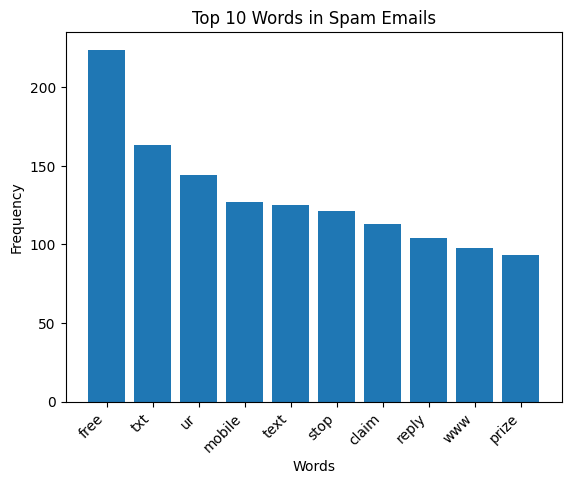

In [18]:
# --------------------- visualization 1-------------------------
spamEmails = emailData[emailData["label"] == "spam"]
hamEmails = emailData[emailData["label"] == "ham"]

spamText = ' '.join(spamEmails['message'])
hamText = ' '.join(hamEmails['message'])

vectorizer2 = CountVectorizer(stop_words='english')
transform = vectorizer2.fit_transform([spamText])

featureNames = vectorizer2.get_feature_names_out()

# Get word frequencies
wordFrequencies = transform.toarray().flatten()

# Create a DataFrame to store word frequencies and names
dfFrequency = pd.DataFrame({'Word': featureNames, 'Frequency': wordFrequencies})

# Sort the DataFrame by frequency in descending order
descFrequency = dfFrequency.sort_values(by='Frequency', ascending=False)

# Plot the top N words
topWords = 10  # Change this value as needed
plot.bar(descFrequency['Word'][:topWords], descFrequency['Frequency'][:topWords])
plot.xlabel('Words')
plot.ylabel('Frequency')
plot.title('Top {} Words in Spam Emails'.format(topWords))
plot.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plot.show()

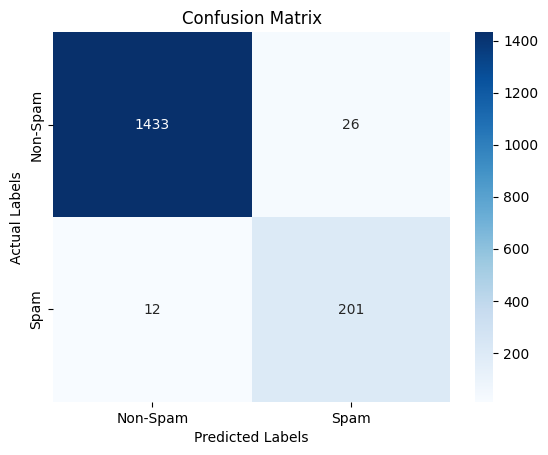

In [19]:
# ---------------------- visualisation 2 -------------------------
confusionMatrix = confusion_matrix(y_test, classifyTest)
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'],
            yticklabels=['Non-Spam', 'Spam'])
plot.xlabel('Predicted Labels')
plot.ylabel('Actual Labels')
plot.title('Confusion Matrix')
plot.show()

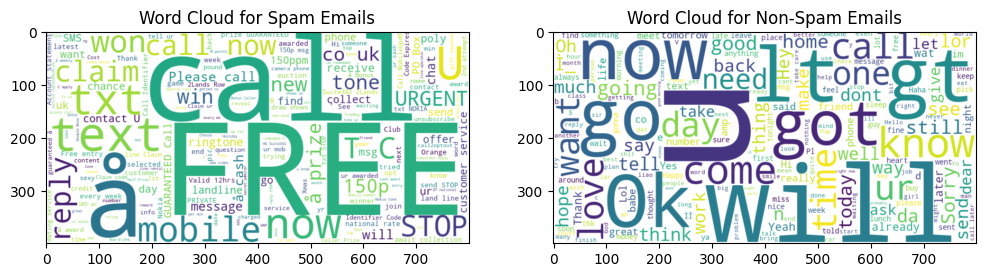

In [20]:
# ------------------------ visualisation 3 ---------------------------
wordcloudSpam = WordCloud(width=800, height=400, background_color='white').generate(spamText)
wordcloudHam = WordCloud(width=800, height=400, background_color='white').generate(hamText)

plot.figure(figsize=(12, 6))
plot.subplot(1, 2, 1)
plot.imshow(wordcloudSpam, interpolation='bilinear')
plot.title('Word Cloud for Spam Emails')

plot.subplot(1, 2, 2)
plot.imshow(wordcloudHam, interpolation='bilinear')
plot.title('Word Cloud for Non-Spam Emails')

plot.show()

In [ ]:
# --------------------- User interface -----------------------------------
while True:
    emailToPredict = input("Please, enter an email text (or type exit to terminate program): ")
    if emailToPredict.lower() == 'exit':
        exit()
    email = vectorizer.transform([emailToPredict])
    prediction = naiveBayesClassifier.predict(email)

    if prediction == 'ham':
        print("This email is likely a NON-spam email", "\n")
    else:
        print("This email is likely a SPAM email", "\n")